# Keras
Librería para programar redes neuronales de una manera más sencilla que con TensorFlow. Keras se encuentra en una capa de abstracción por encima de TensorFlow.

[Documentación](https://keras.io/guides/)

In [ ]:
!pip install tensorflow
!pip install keras

Empezamos importando librerías

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import numpy as np

Cargamos los datos de mnist. No vamos a tratar imagenes con redes convolucionales (perdemos la estructura espacial 2D). Todos los pixeles se convertirán en un vector de 28x28 features independientes, que serán las entradas del modelo.

In [3]:
# Cogemos las imágenes de los dígitos asi como el conjunto de train y test
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

Vemos dimensiones del dataset

In [4]:
'''
60.000 imagenes de 28x28 pixeles
'''
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [5]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [8]:
2**8

256

60.000 imágenes de 28x28 pixeles. Vamos a representar una de ellas

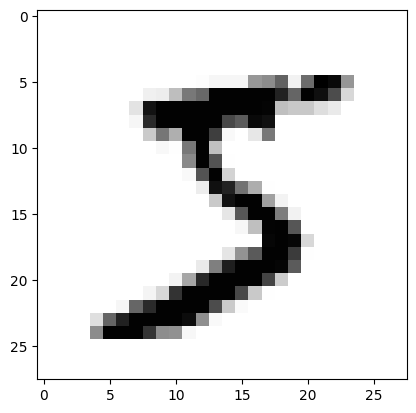

In [6]:
import matplotlib.pyplot as plt
from matplotlib import colormaps

plt.imshow(X_train[0], cmap=colormaps.get("Greys"));

In [7]:
28*28

784

Cada imagen se compone de 28x28 pixeles, y cada pixel representa una escala de grises que va del 0 al 255. Siendo 0 el blanco y 255 negro.

¿Se te ocurre alguna manera de normalizar los datos?

In [7]:
np.max(X_train)

255

In [8]:
0/255

0.0

In [9]:
128/255

0.5019607843137255

In [10]:
255/255

1.0

In [11]:
X_train = X_train.astype("float32")/255
X_test = X_test.astype("float32")/255

In [12]:
np.mean(X_train)

0.13066062

In [13]:
'''
Comprobamos la normalización
'''
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [14]:
y_train = y_train.astype("float32")
y_test = y_test.astype("float32")

Guardamos datos para validación. Estos datos se usarán durante el entrenamiento. Otra opción es decirle a keras en la etapa de entrenamiento que reserve un X % de los datos para validar.

In [15]:
X_val = X_train[-10000:]
y_val = y_train[-10000:]

X_train = X_train[:-10000]
y_train = y_train[:-10000]

In [17]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(50000, 28, 28)
(10000, 28, 28)
(10000, 28, 28)


Montamos la arquitectura de la red neuronal. Se va a componer de:
* **Sequential**: API para iniciar la red neuronal. No cuenta como capa.
* **Flatten**: capa de entrada. Necesita un vector unidimensional. Como tenemos imágenes, esta capa aplana las imagenes (2D) en 1D.
* **Dense**: es una hidden layer. Se compondrá de `n` neuronas y de una función de activación que se aplicará a todas las neuronas de la capa.

Recuerda que es un problema de clasificación multiclase (10 clases) y que por tanto la última capa se compondrá de tantas neuronas como clases tengas.

En cuanto a las funciones de activación es recomendable usar relu en las hidden layer, que tarda menos en entrenar, mientras que la ultima (output) suele ser una softmax.

In [19]:
X_train.shape

(50000, 28, 28)

In [20]:
model = keras.models.Sequential()

# Capa entrada
model.add(keras.layers.Flatten(input_shape=(28, 28)))

# Hidden layer
model.add(keras.layers.Dense(units = 300,
                            activation='relu'))

# Hidden layer
model.add(keras.layers.Dense(units = 100,
                            activation='relu'))

# Capa salida
model.add(keras.layers.Dense(units = 10,
                            activation='softmax'))

/home/iraitz/TheBridge/FEB24 -BIL  DS PT/TheBridge_DSPT_ML/.venv311/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
I0000 00:00:1721406189.265862    7085 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-07-19 18:23:09.350220: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2343] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your 

In [21]:
# Otra manera de declarar la red neuronal
capas = [
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(units = 300, activation='relu'),
    keras.layers.Dense(units = 100, activation='relu'),
    keras.layers.Dense(units = 10, activation='softmax')
]

model = keras.models.Sequential(capas)

Podemos ver las capas, y acceder a sus elementos

In [23]:
print(model.layers[0])

<Flatten name=flatten_1, built=True>


Podemos ver los pesos de las capas sin entrenar, porque los inicializa aleatoriamente. Los bias los inicializa a 0.

In [37]:
hidden1 = model.layers[1]
weights, biases = hidden1.get_weights()

In [38]:
(28*28)*300

235200

In [40]:
weights.size

235200

In [35]:
weights

array([[-0.11652751, -0.02649815, -0.11475682, ...,  0.11500321,
        -0.02431091,  0.07286634],
       [ 0.12038743,  0.0842917 ,  0.05274238, ...,  0.03816404,
         0.01247164,  0.02978063],
       [ 0.06812752, -0.03164355,  0.10258888, ..., -0.02011981,
         0.0370261 ,  0.02483585],
       ...,
       [-0.09861866,  0.05310974, -0.03859965, ...,  0.05567525,
        -0.06211164,  0.08660325],
       [-0.11689424, -0.06361355,  0.04792198, ..., -0.05191415,
        -0.05309185,  0.03113756],
       [-0.11694493,  0.08379363, -0.07965459, ...,  0.10613207,
        -0.03914487,  0.02253797]], dtype=float32)

In [32]:
len(weights)

784

In [33]:
len(weights[0])

300

In [34]:
28*28

784

In [35]:
300*784

235200

In [36]:
weights.size

235200

In [37]:
len(biases)

300

Establecemos la configuración de ejecución... el compile.

In [42]:
model.compile(
    optimizer = keras.optimizers.SGD(),
    loss = keras.losses.SparseCategoricalCrossentropy(),
    metrics = [keras.metrics.SparseCategoricalAccuracy()]
)

In [43]:
# Equivalente
model.compile(
    optimizer = "sgd",
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

In [44]:
# Summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [41]:
784 * 300 + 300

235500

In [42]:
# 1º neurona de la 1º hidden layer
# y = a + w1*x1 + w2*x2 + .... wn*xn
# a es el intercepto llamado bias
# wn es cada uno de los pesos que va a ir actualizando con el backpropagation
# n es 784
# En la 1º hidden layer tenemos 784 pesos por cada neurona, al tener 300, tenemos un total de:
print(784*300 + 300)

235500


In [43]:
300 * 784 + 300

235500

In [44]:
300 * 100 + 100

30100

In [45]:
100 * 10 + 10

1010

Entrenamos el modelo. Usamos los datos de entrenamiento. El batch_size es la cantidad de muestras que utiliza el SGD, y las epochs son las iteraciones que realiza en el entrenamiento.

In [46]:
X_train.shape

(50000, 28, 28)

In [47]:
50000/128

390.625

In [45]:
history = model.fit(
    X_train,
    y_train,
    batch_size = 128,
    epochs = 50,
    validation_data = (X_val, y_val) # validation_split = 0.1
)

Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5236 - loss: 1.7216 - val_accuracy: 0.8671 - val_loss: 0.5868
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8587 - loss: 0.5635 - val_accuracy: 0.8973 - val_loss: 0.3876
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8873 - loss: 0.4131 - val_accuracy: 0.9081 - val_loss: 0.3305
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8977 - loss: 0.3650 - val_accuracy: 0.9153 - val_loss: 0.3012
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9099 - loss: 0.3184 - val_accuracy: 0.9225 - val_loss: 0.2791
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9169 - loss: 0.2960 - val_accuracy: 0.9259 - val_loss: 0.2641
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9205 - loss: 0.2846 - val_accuracy: 0.9294 - val_loss: 0.2524
Epoch 8/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9230 - loss: 0.2751 - val_accuracy: 0.

Podemos reentrenar el modelo. No empieza de nuevo, sino que retoma el entrenamiento anterior.

In [48]:
model.fit(
    X_train,
    y_train,
    batch_size = 64,
    epochs = 10,
    validation_data = (X_val, y_val) # validation_split = 0.1
)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9774 - loss: 0.0826 - val_accuracy: 0.9703 - val_loss: 0.1043
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9785 - loss: 0.0780 - val_accuracy: 0.9710 - val_loss: 0.1029
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9795 - loss: 0.0751 - val_accuracy: 0.9698 - val_loss: 0.1046
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9782 - loss: 0.0768 - val_accuracy: 0.9710 - val_loss: 0.0982
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9817 - loss: 0.0691 - val_accuracy: 0.9710 - val_loss: 0.0996
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9819 - loss: 0.0677 - val_accuracy: 0.9723 - val_loss: 0.0958
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9821 - loss: 0.0668 - val_accuracy: 0.9726 - val_loss: 0.0936
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9829 - loss: 0.0630 - val_accuracy: 0.

Veamos el histórico del entrenamiento, para poder representarlo posteriormente.

In [50]:
# print(history.params)
# print(history.epoch)
print(history.history)

{'accuracy': [0.6968799829483032, 0.8698800206184387, 0.8913800120353699, 0.9032400250434875, 0.9101399779319763, 0.9161800146102905, 0.9213600158691406, 0.9247599840164185, 0.9283599853515625, 0.9313799738883972, 0.9337800145149231, 0.936680018901825, 0.9386600255966187, 0.9413800239562988, 0.9434800148010254, 0.9451000094413757, 0.9466999769210815, 0.9485399723052979, 0.9500600099563599, 0.9519199728965759, 0.9533600211143494, 0.953819990158081, 0.9559000134468079, 0.956820011138916, 0.9581599831581116, 0.9591000080108643, 0.9602199792861938, 0.9614599943161011, 0.9625399708747864, 0.9635400176048279, 0.9643399715423584, 0.965719997882843, 0.9666000008583069, 0.9675800204277039, 0.9678199887275696, 0.9691600203514099, 0.9696199893951416, 0.9701200127601624, 0.9714000225067139, 0.9719399809837341, 0.9728000164031982, 0.9737200140953064, 0.9740800261497498, 0.9743599891662598, 0.9751999974250793, 0.9757000207901001, 0.9762600064277649, 0.9767600297927856, 0.9776999950408936, 0.97769999

In [51]:
history.history

{'accuracy': [0.6968799829483032,
  0.8698800206184387,
  0.8913800120353699,
  0.9032400250434875,
  0.9101399779319763,
  0.9161800146102905,
  0.9213600158691406,
  0.9247599840164185,
  0.9283599853515625,
  0.9313799738883972,
  0.9337800145149231,
  0.936680018901825,
  0.9386600255966187,
  0.9413800239562988,
  0.9434800148010254,
  0.9451000094413757,
  0.9466999769210815,
  0.9485399723052979,
  0.9500600099563599,
  0.9519199728965759,
  0.9533600211143494,
  0.953819990158081,
  0.9559000134468079,
  0.956820011138916,
  0.9581599831581116,
  0.9591000080108643,
  0.9602199792861938,
  0.9614599943161011,
  0.9625399708747864,
  0.9635400176048279,
  0.9643399715423584,
  0.965719997882843,
  0.9666000008583069,
  0.9675800204277039,
  0.9678199887275696,
  0.9691600203514099,
  0.9696199893951416,
  0.9701200127601624,
  0.9714000225067139,
  0.9719399809837341,
  0.9728000164031982,
  0.9737200140953064,
  0.9740800261497498,
  0.9743599891662598,
  0.9751999974250793,
  

In [52]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [53]:
pd.DataFrame(history.history)

,accuracy,loss,val_accuracy,val_loss
0,0.69688,1.252729,0.8671,0.586801
1,0.86988,0.509553,0.8973,0.387639
2,0.89138,0.395304,0.9081,0.330455
3,0.90324,0.347665,0.9153,0.301196
4,0.91014,0.318685,0.9225,0.279133
5,0.91618,0.297340,0.9259,0.264149
6,0.92136,0.280757,0.9294,0.252415
7,0.92476,0.266923,0.9320,0.240528
8,0.92836,0.254777,0.9336,0.232430
9,0.93138,0.243807,0.9374,0.223024


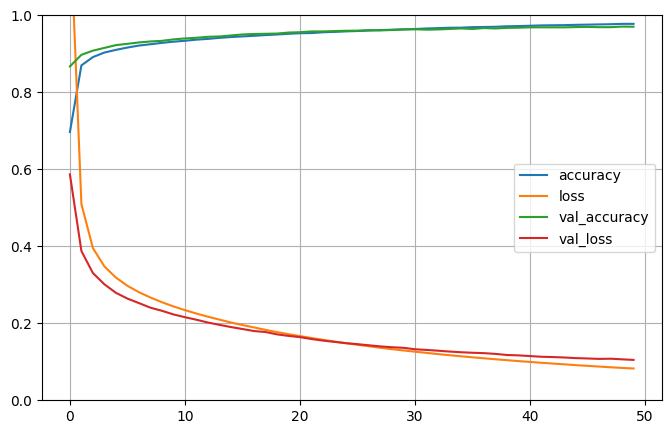

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

Si el modelo no ha ido bien, prueba a cambiar el learning rate, cambia de optimizador y después prueba a cambiar capas, neuronas y funciones de activación.

Ya tenemos el modelo entrenado. Probémoslo con test

In [55]:
results = model.evaluate(X_test, y_test)
results

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 969us/step - accuracy: 0.9702 - loss: 0.1032


[0.08928648382425308, 0.9739000201225281]

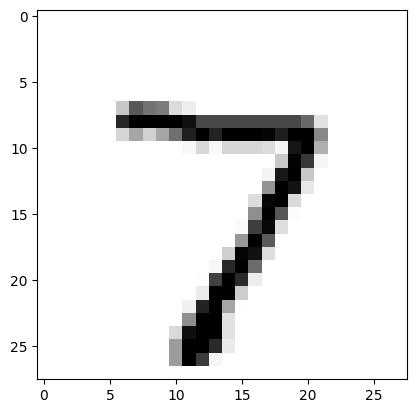

In [56]:
# Cogemos el primero
plt.imshow(X_test[0].reshape(28,28), cmap=colormaps.get("Greys"));

In [58]:
X_test[:1]

array([[[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.

In [57]:
predictions = model.predict(X_test[:1])
print(predictions.shape)
predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
(1, 10)


array([[1.3138080e-05, 2.6337739e-07, 2.4130974e-04, 1.5588086e-03,
        6.7710936e-08, 3.4770876e-06, 2.7992281e-10, 9.9811769e-01,
        3.0105450e-05, 3.5137171e-05]], dtype=float32)

In [59]:
predictions.argmax()

7

In [60]:
model.predict(X_test).argmax(axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([7, 2, 1, ..., 4, 5, 6])

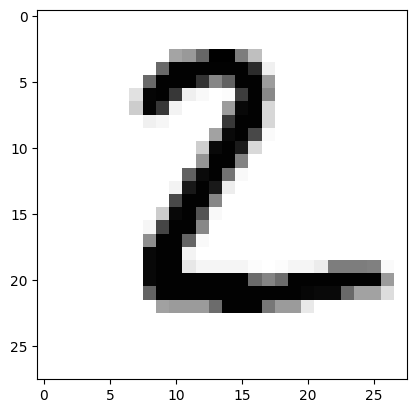

In [61]:
plt.imshow(X_test[1].reshape(28,28), cmap=colormaps.get("Greys"));

In [62]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, model.predict(X_test).argmax(axis=1))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 979us/step


array([[ 962,    0,    1,    2,    1,    4,    7,    1,    1,    1],
       [   0, 1124,    2,    1,    0,    1,    5,    0,    2,    0],
       [   6,    2, 1003,    4,    1,    0,    4,    5,    7,    0],
       [   0,    0,    3,  993,    0,    4,    1,    3,    4,    2],
       [   2,    0,    3,    0,  958,    0,    3,    2,    1,   13],
       [   4,    0,    0,    7,    1,  863,   11,    1,    3,    2],
       [   4,    2,    1,    0,    4,    4,  941,    0,    2,    0],
       [   0,    8,    9,    6,    1,    0,    0,  990,    1,   13],
       [   3,    0,    2,   10,    6,    5,   10,    4,  931,    3],
       [   3,    5,    1,    7,    9,    2,    1,    7,    0,  974]])

### Problema de regresión
Veamos un ejemplo de cómo aplicar una red neuronal de TensorFlow a un problema de regresión.

In [63]:
# Cargamos datos
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns = housing.feature_names)
df['target'] = housing['target']
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Divimos en train, test y validation

In [68]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data,
                                                              housing.target)

X_train, X_valid, y_train, y_valid = train_test_split(X_train_full,
                                                      y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [69]:
X_train.shape

(11610, 8)

Montamos el modelo. Simplemente se compondrá de una hidden layer, a la que le configuramos una capa previa de entrada de 8 neuronas (las features).

Se trata de un modelo de regresión, por lo que la capa de salida es una única neurona.

In [70]:
11610/32

362.8125

In [71]:
X_train.shape[1:]

(8,)

In [72]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation = 'relu',
                      input_shape = X_train.shape[1:]),
    keras.layers.Dense(1)
])

model.compile(loss = "mean_squared_error",
             optimizer = "sgd")

history = model.fit(X_train,
                   y_train,
                   epochs = 20,
                   validation_data = (X_valid, y_valid))

Epoch 1/20
  1/363 ━━━━━━━━━━━━━━━━━━━━ 44s 123ms/step - loss: 4.9327

/home/iraitz/TheBridge/FEB24 -BIL  DS PT/TheBridge_DSPT_ML/.venv311/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 940us/step - loss: 1.1105 - val_loss: 0.5675
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 698us/step - loss: 0.7700 - val_loss: 0.5133
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 662us/step - loss: 0.4984 - val_loss: 0.4928
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 692us/step - loss: 0.4651 - val_loss: 0.4717
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 637us/step - loss: 0.4259 - val_loss: 0.4554
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 677us/step - loss: 0.4269 - val_loss: 0.5360
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 738us/step - loss: 0.4417 - val_loss: 0.4412
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 708us/step - loss: 0.4303 - val_loss: 0.4423
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 735us/step - loss: 0.4064 - val_loss: 0.4389
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 685us/step - loss: 0.4352 - val_loss: 0.4330
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 656us/step - loss: 0.4024 - val_loss: 0.4208
Epoch 12/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 

In [78]:
history = model.fit(X_train,
                   y_train,
                   epochs = 20,
                   validation_data = (X_valid, y_valid))

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 796us/step - loss: 0.3608 - val_loss: 0.3623
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 752us/step - loss: 0.3262 - val_loss: 0.3683
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 664us/step - loss: 0.3728 - val_loss: 0.3649
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 685us/step - loss: 0.3371 - val_loss: 1.4183
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 704us/step - loss: 0.4038 - val_loss: 0.3720
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 674us/step - loss: 0.3627 - val_loss: 0.3623
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 696us/step - loss: 0.3400 - val_loss: 0.3616
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 678us/step - loss: 0.3421 - val_loss: 0.3715
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 690us/step - loss: 0.3409 - val_loss: 0.3533
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 660us/step - loss: 0.3408 - val_loss: 0.3530
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 674us/step - loss: 0.3237 - val_loss: 0.3537
Epoch 12/20
363/363 ━━━━━━━━━━

In [73]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 30)             │           270 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 303 (1.19 KB)

 Trainable params: 301 (1.18 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [79]:
mse_test = model.evaluate(X_test, y_test)
print(mse_test)

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step - loss: 0.3362
0.342844158411026


In [80]:
y_pred = model.predict(X_test[:5])
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


array([[3.2755768],
       [1.0179513],
       [1.2498615],
       [1.3670822],
       [6.1331263]], dtype=float32)

In [81]:
y_test[:5]

array([2.545  , 0.893  , 1.323  , 1.625  , 5.00001])

### Guardar modelo
Para guardar el modelo, en el formato de Keras (HDF5). 

In [74]:
model.save("my_keras_model.keras")

In [75]:
# Lo volvemos a cargar
model = keras.models.load_model("my_keras_model.keras")

### Callbacks
Son funciones predefinidas de Keras a aplicar durante el entrenamiento
Por ejemplo, `ModelCheckpoint` sirve para que el modelo se vaya guardando tras cada epoch. Así no perdemos el progreso en caso de que decidamos interrumpir el entrenamiento. El callback recibe como argumento el nombre del objeto donde queremos que se guarde el modelo entrenado.

In [82]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("callback_model.keras")
history = model.fit(X_train,
                   y_train,
                   epochs=30,
                   callbacks = [checkpoint_cb])

Epoch 1/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 601us/step - loss: 0.3154
Epoch 2/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 512us/step - loss: 0.3267
Epoch 3/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 474us/step - loss: 0.3308
Epoch 4/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 497us/step - loss: 0.3225
Epoch 5/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 528us/step - loss: 0.3205
Epoch 6/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 510us/step - loss: 0.3129
Epoch 7/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step - loss: 0.3473
Epoch 8/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 457us/step - loss: 0.3105
Epoch 9/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step - loss: 0.3299
Epoch 10/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 515us/step - loss: 0.3145
Epoch 11/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 524us/step - loss: 0.3249
Epoch 12/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 445us/step - loss: 0.3259
Epoch 13/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 508us/step - loss: 0.3173
Epoch 14/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 530us/step - loss: 0.3263
Epoch 15/30
363/363 ━━━━━━━━━

### Early Stopping
Interrumpe el entrenamiento cuando no ve progreso en el set de validación. Para ello tiene en cuenta un numero de epochs llamado `patience`. Se puede combinar con el callback

In [83]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10)
history = model.fit(X_train,
                   y_train,
                   epochs=50,
                   validation_data = (X_valid, y_valid),
                   callbacks = [early_stopping_cb, checkpoint_cb])

Epoch 1/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 927us/step - loss: 0.3144 - val_loss: 0.3400
Epoch 2/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 682us/step - loss: 0.3219 - val_loss: 0.3389
Epoch 3/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 708us/step - loss: 0.3081 - val_loss: 0.3371
Epoch 4/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 683us/step - loss: 0.3082 - val_loss: 0.3448
Epoch 5/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 685us/step - loss: 0.3150 - val_loss: 0.3399
Epoch 6/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 706us/step - loss: 0.3114 - val_loss: 0.3349
Epoch 7/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 623us/step - loss: 0.3168 - val_loss: 0.3361
Epoch 8/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 686us/step - loss: 0.2955 - val_loss: 0.3387
Epoch 9/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 656us/step - loss: 0.3104 - val_loss: 0.3421
Epoch 10/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 689us/step - loss: 0.3038 - val_loss: 0.3374
Epoch 11/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 690us/step - loss: 0.3037 - val_loss: 0.3559
Epoch 12/50
363/363 ━━━━━━━━━━